Github:https://github.com/ShusenTang/Dive-into-DL-PyTorch  
Web:https://tangshusen.me/Dive-into-DL-PyTorch/#/

## 3.2 线性回归的从零开始实现

In [2]:
import torch
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

### 3.2.1 生成数据集

In [3]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()

In [4]:
# 构造一个简单的人工训练数据集,使用线性回归模型真实权重 w=[2,−3.4]⊤w=[2,−3.4]⊤和偏差 b=4.2，以及一个随机噪声项ϵ来生成标签
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

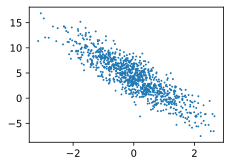

In [5]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), s=1)

### 3.2.2 读取数据

In [7]:
# 定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[-0.9433,  0.3817],
        [-0.3775, -1.6547],
        [ 0.0392, -0.4265],
        [-0.4291, -0.7730],
        [-0.3201,  1.7261],
        [-0.5394, -0.2981],
        [-0.7402, -0.0294],
        [-0.4856,  1.2269],
        [ 1.0072, -1.6770],
        [-0.5925, -0.0726]]) tensor([ 1.0031,  9.0760,  5.7227,  5.9714, -2.3043,  4.1349,  2.8162, -0.9444,
        11.9053,  3.2530])
